In [703]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from evds import evdsAPI
from datetime import date

In [704]:
evds=evdsAPI('dsIC3fiGlu')


In [705]:
usd=evds.get_data(["TP.DK.USD.S.YTL"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=2)
usd.dropna(inplace=True)
usd

,Tarih,TP_DK_USD_S_YTL
0,01-02-2006,1.3263
1,02-02-2006,1.3241
2,03-02-2006,1.3277
3,06-02-2006,1.3257
4,07-02-2006,1.3296
...,...,...
4608,02-10-2023,27.4260
4609,03-10-2023,27.4537
4610,04-10-2023,27.5013
4611,05-10-2023,27.5812


In [706]:
usd['Tarih'] = pd.to_datetime(usd['Tarih'], format='%d-%m-%Y')

# Tarihi indeks olarak ayarla
usd.set_index('Tarih', inplace=True)

# Aylık ortalama değerleri hesapla
usd = usd.resample('M').mean()

# Sonucu görüntüle
usd

,TP_DK_USD_S_YTL
Tarih,
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
2006-06-30,1.600536
...,...
2023-06-30,23.106042
2023-07-31,26.470338
2023-08-31,26.999127


In [707]:
enf=evds.get_data(["TP.FG.J0"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"))
enf

,Tarih,TP_FG_J0
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
207,2023-5,1300.60
208,2023-6,1351.59
209,2023-7,1479.84
210,2023-8,1614.31


In [708]:

enf=pd.DataFrame(enf)
enf.columns=["Tarih","TÜFE"]


In [709]:

inflation=pd.DataFrame.from_dict({'Tarih':["2023-10"],'TÜFE': [1760]})
inflation=pd.concat([enf,inflation],axis=0)
inflation

,Tarih,TÜFE
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
208,2023-6,1351.59
209,2023-7,1479.84
210,2023-8,1614.31
211,2023-9,1691.04


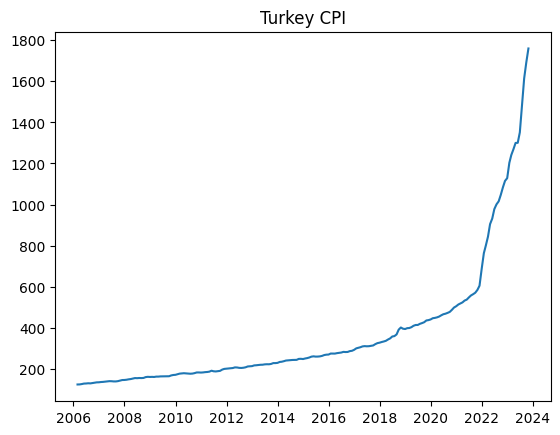

In [710]:
dates=pd.date_range('2006-02-01','2023-11-01' , freq='1M')
df=pd.DataFrame()

df["CPI"]=inflation["TÜFE"]
df=df.set_index(dates)
plt.figure()
plt.title("Turkey CPI")

plt.plot(df)
plt.show()


In [711]:
df6=pd.DataFrame()
df6["USD/TL"]=usd["TP_DK_USD_S_YTL"]

df6["USD/TL"]=df6["USD/TL"].astype(float)
df6

,USD/TL
Tarih,
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
2006-06-30,1.600536
...,...
2023-06-30,23.106042
2023-07-31,26.470338
2023-08-31,26.999127


In [712]:
dates= pd.date_range('2006-02-01','2023-11-01' , freq='1M')

            
df6=df6.set_index(dates)

df6["Onceki USD/TL"]=df6["USD/TL"].shift(1)
df6.iloc[0,1]=1.32
df6


,USD/TL,Onceki USD/TL
2006-02-28,1.326535,1.320000
2006-03-31,1.335139,1.326535
2006-04-30,1.337345,1.335139
2006-05-31,1.420659,1.337345
2006-06-30,1.600536,1.420659
...,...,...
2023-06-30,23.106042,19.719514
2023-07-31,26.470338,23.106042
2023-08-31,26.999127,26.470338
2023-09-30,26.989448,26.999127


In [713]:
money=evds.get_data(["TP.PR.ARZ13"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
money

,Tarih,TP_PR_ARZ13
0,2006-2,2.423895e+08
1,2006-3,2.494857e+08
2,2006-4,2.521919e+08
3,2006-5,2.751947e+08
4,2006-6,2.791388e+08
...,...,...
207,2023-5,9.409317e+09
208,2023-6,1.083453e+10
209,2023-7,1.147848e+10
210,2023-8,1.202532e+10


In [714]:
#Cleaning the data

money_supply=pd.DataFrame(money)
money_supply=money_supply.set_index(pd.date_range('2006-02-01','2023-10-01' , freq='1M')-pd.offsets.MonthBegin(1))
money_supply.columns=["Tarih","Para Arzi"]
money_supply["Para Arzi"]=money_supply["Para Arzi"].astype(float)
money1=pd.DataFrame.from_dict({'Tarih':["2023-10"],'Para Arzi': [13095000000]})
money=pd.concat([money_supply,money1],axis=0)
money


,Tarih,Para Arzi
2006-02-01 00:00:00,2006-2,2.423895e+08
2006-03-01 00:00:00,2006-3,2.494857e+08
2006-04-01 00:00:00,2006-4,2.521919e+08
2006-05-01 00:00:00,2006-5,2.751947e+08
2006-06-01 00:00:00,2006-6,2.791388e+08
...,...,...
2023-06-01 00:00:00,2023-6,1.083453e+10
2023-07-01 00:00:00,2023-7,1.147848e+10
2023-08-01 00:00:00,2023-8,1.202532e+10
2023-09-01 00:00:00,2023-9,1.234928e+10


In [715]:
money=money.set_index(pd.date_range('2006-02-01','2023-11-01' , freq='1M'))
money["Para Arzi"]=money["Para Arzi"]/1e+08
del money["Tarih"]
money["Para Arzi Onceki"]=money["Para Arzi"].shift(1)
money=money.dropna(axis=0)
money


,Para Arzi,Para Arzi Onceki
2006-03-31,2.494857,2.423895
2006-04-30,2.521919,2.494857
2006-05-31,2.751947,2.521919
2006-06-30,2.791388,2.751947
2006-07-31,2.711670,2.791388
...,...,...
2023-06-30,108.345324,94.093167
2023-07-31,114.784753,108.345324
2023-08-31,120.253199,114.784753
2023-09-30,123.492792,120.253199


In [716]:
brent=evds.get_data(["TP.BRENTPETROL.EUBP"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=1)
brent

,Tarih,TP_BRENTPETROL_EUBP
0,01-02-2006,65.64
1,02-02-2006,63.49
2,03-02-2006,62.54
3,06-02-2006,63.32
4,07-02-2006,61.64
...,...,...
4599,19-09-2023,96.11
4600,20-09-2023,94.56
4601,21-09-2023,93.70
4602,22-09-2023,93.99


In [717]:
brent['Tarih'] = pd.to_datetime(brent['Tarih'], format='%d-%m-%Y')

# Tarihi indeks olarak ayarla
brent.set_index('Tarih', inplace=True)

# Aylık ortalama değerleri hesapla
brent = brent.resample('M').mean()

# Sonucu görüntüle

brent

,TP_BRENTPETROL_EUBP
Tarih,
2006-02-28,60.210000
2006-03-31,62.064783
2006-04-30,70.260000
2006-05-31,69.776957
2006-06-30,68.555909
...,...
2023-05-31,75.466000
2023-06-30,74.839091
2023-07-31,80.108095


In [718]:

brent1=pd.concat([brent,pd.DataFrame({"2023-10": [85]})],axis=0)
brent1.columns=["Brent","A"]
brent1.iloc[212,0]=85
del brent1["A"]
brent1=brent1.set_index(pd.date_range('2006-02-28','2023-11-29' , freq='1M'))
brent1

,Brent
2006-02-28,60.210000
2006-03-31,62.064783
2006-04-30,70.260000
2006-05-31,69.776957
2006-06-30,68.555909
...,...
2023-06-30,74.839091
2023-07-31,80.108095
2023-08-31,86.147727
2023-09-30,93.182941


In [719]:
df14=pd.DataFrame()
dates=pd.date_range('2006-02-28','2023-11-29' , freq='1M')

df14["Brent"]=brent1["Brent"]
df14["TIME"]=dates
df14['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df14['TIME'] =  pd.to_datetime(df14['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df14 = df14.set_index(['TIME'])
df14

C:\Users\Bora\AppData\Local\Temp\ipykernel_21108\3746592372.py:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df14['TIME'] =  pd.to_datetime(df14['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)


,Brent
TIME,
2006-02-28,60.210000
2006-03-31,62.064783
2006-04-30,70.260000
2006-05-31,69.776957
2006-06-30,68.555909
...,...
2023-06-30,74.839091
2023-07-31,80.108095
2023-08-31,86.147727


In [720]:
kredi=evds.get_data(["TP.KREDI.L001"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
kredi

,Tarih,TP_KREDI_L001
0,2006-2,1.381847e+08
1,2006-3,1.481222e+08
2,2006-4,1.527510e+08
3,2006-5,1.664881e+08
4,2006-6,1.740395e+08
...,...,...
207,2023-5,8.804344e+09
208,2023-6,9.564604e+09
209,2023-7,9.846895e+09
210,2023-8,9.923806e+09


In [721]:
dates=pd.date_range('2006-02-01','2023-10-01' , freq='1M')-pd.offsets.MonthBegin(1)
kredi=pd.DataFrame(kredi)
kredi.columns=["Tarih","Kredi"]
kredi["Kredi"]=kredi["Kredi"]/1e+08
kredi

,Tarih,Kredi
0,2006-2,1.381847
1,2006-3,1.481222
2,2006-4,1.527510
3,2006-5,1.664881
4,2006-6,1.740395
...,...,...
207,2023-5,88.043441
208,2023-6,95.646045
209,2023-7,98.468952
210,2023-8,99.238055


In [722]:
df3=pd.DataFrame()
df3["Kredi"]=kredi["Kredi"]
df3["TIME"]=dates
df3['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df3['TIME'] =  pd.to_datetime(df3['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df3 = df3.set_index(['TIME'])
df3=pd.concat([df3,pd.DataFrame({"Kredi": [106.01]})],axis=0)
df3=df3.set_index(pd.date_range('2006-02-28','2023-11-29' , freq='1M'))
df3

C:\Users\Bora\AppData\Local\Temp\ipykernel_21108\3817705556.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df3['TIME'] =  pd.to_datetime(df3['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)


,Kredi
2006-02-28,1.381847
2006-03-31,1.481222
2006-04-30,1.527510
2006-05-31,1.664881
2006-06-30,1.740395
...,...
2023-06-30,95.646045
2023-07-31,98.468952
2023-08-31,99.238055
2023-09-30,102.582110


In [723]:
pfaiz=evds.get_data(["TP.APIFON4"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
pfaiz.columns=["Tarih","Faiz"]
pfaiz.iloc[:11,1]=17.5
pfaiz.iloc[11:23,1]=21.5
pfaiz.iloc[23:35,1]=19.25
pfaiz.iloc[35:47,1]=10.25
pfaiz.iloc[47:59,1]=8
pfaiz["Faiz"]=pfaiz["Faiz"].astype(float)
pfaiz.iloc[212,1]=35
pfaiz



,Tarih,Faiz
0,2006-2,17.50
1,2006-3,17.50
2,2006-4,17.50
3,2006-5,17.50
4,2006-6,17.50
...,...,...
208,2023-6,12.84
209,2023-7,17.50
210,2023-8,23.50
211,2023-9,31.00


C:\Users\Bora\AppData\Local\Temp\ipykernel_21108\1609234707.py:6: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  pfaiz['TIME'] =  pd.to_datetime(pfaiz['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)


Text(0.5, 1.0, 'TCMB Fonlama Faizi')

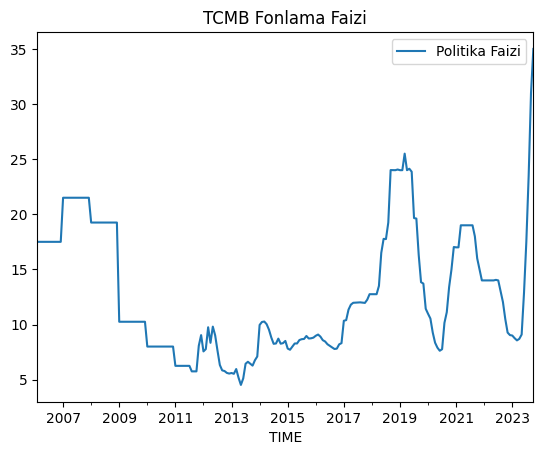

In [724]:
dates=pd.date_range('2006-02-28','2023-11-29' , freq='1M')
pfaiz=pd.DataFrame(pfaiz)
pfaiz.columns=["Tarih","Politika Faizi"]
pfaiz["TIME"]=dates
pfaiz['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
pfaiz['TIME'] =  pd.to_datetime(pfaiz['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
pfaiz = pfaiz.set_index(['TIME'])
del pfaiz["Tarih"]
pfaiz.plot(label="TCMB Fonlama Faizi")
plt.title("TCMB Fonlama Faizi")

In [725]:
kfaiz=evds.get_data(["TP.KTFTUK"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
kfaiz.columns=["Tarih","Kredi Faizi"]
kfaiz=kfaiz.set_index(kfaiz["Tarih"])
del kfaiz["Tarih"]
kfaiz=kfaiz.astype(float)
kfaiz=kfaiz.set_index(pd.date_range('2006-02-01','2023-10-01' , freq='1M')-pd.offsets.MonthBegin(1))
kfaiz=pd.concat([kfaiz,pd.DataFrame({"Kredi Faizi": [61.83]})],axis=0)
kfaiz=kfaiz.set_index(pd.date_range('2006-02-28','2023-11-29' , freq='1M'))
kfaiz

,Kredi Faizi
2006-02-28,17.2975
2006-03-31,17.0080
2006-04-30,16.2075
2006-05-31,16.3000
2006-06-30,19.6700
...,...
2023-06-30,38.5600
2023-07-31,45.8250
2023-08-31,45.7650
2023-09-30,56.2980


In [726]:
df["Yıllık Enflasyon"]=df["CPI"].pct_change(periods=12)*100
df=df.set_index(pd.date_range('2006-02-28','2023-11-29' , freq='1M'))


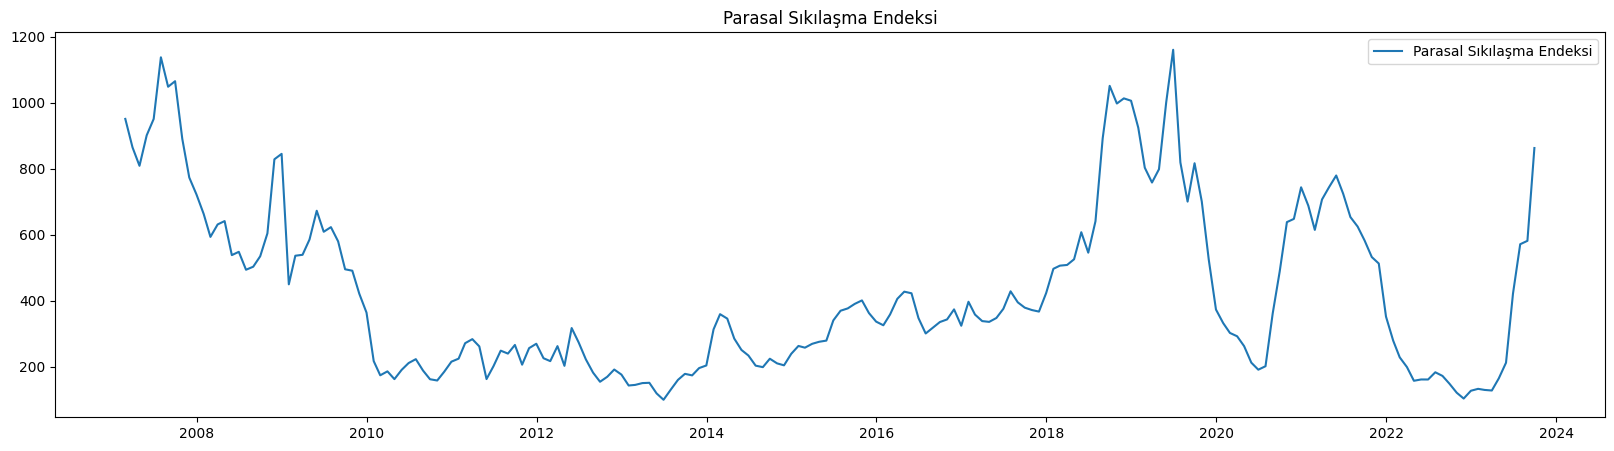

In [727]:
endeks=((df6["USD/TL"].iloc[12:212]*(pfaiz["Politika Faizi"].iloc[12:212]*kfaiz["Kredi Faizi"].iloc[12:212])))/(((df["CPI"].iloc[12:212]*df["Yıllık Enflasyon"].iloc[12:212]))+df3["Kredi"].iloc[12:212])
endeks=endeks*(100/endeks.min())
plt.figure(figsize=(20,5)) 
plt.plot(endeks,label="Parasal Sıkılaşma Endeksi")
plt.title("Parasal Sıkılaşma Endeksi")
plt.legend()
plt.show()


In [728]:
X=pd.concat([df6["USD/TL"].rolling(3).mean(),money["Para Arzi Onceki"],df14.Brent,df3.Kredi,kfaiz["Kredi Faizi"],endeks],axis=1)
X.columns=["USD/TL","Para Arzi","Brent","Kredi","Kredi Faizi","Parasal Sıkılaşma Endeksi"]
X=X.dropna(axis=0)
X=X.head(210)
X=X.tail(200)
X


,USD/TL,Para Arzi,Brent,Kredi,Kredi Faizi,Parasal Sıkılaşma Endeksi
2007-02-28,1.418957,3.008989,57.555789,1.931193,23.0325,950.790313
2007-03-31,1.411077,2.982621,62.050455,1.998175,22.3980,864.577475
2007-04-30,1.389462,3.073813,67.485789,2.032833,21.6600,808.754041
2007-05-31,1.369910,3.097736,67.212273,2.058730,21.2500,901.085561
2007-06-30,1.340548,3.168990,71.045714,2.146599,21.1060,950.612573
...,...,...,...,...,...,...
2023-05-31,19.353341,95.059993,75.466000,88.043441,32.0225,212.288064
2023-06-30,20.720863,94.093167,74.839091,95.646045,38.5600,421.688835
2023-07-31,23.098631,108.345324,80.108095,98.468952,45.8250,571.209451
2023-08-31,25.525169,114.784753,86.147727,99.238055,45.7650,581.440451


In [729]:
y=pd.DataFrame(df["CPI"])
y["CPI"]=y["CPI"].astype(float)
y=y.set_index(pd.date_range('2006-02-28','2023-11-29' , freq='1M'))
y=y.iloc[12:212]
y


,CPI
2007-02-28,136.42
2007-03-31,137.67
2007-04-30,139.33
2007-05-31,140.03
2007-06-30,139.69
...,...
2023-05-31,1300.60
2023-06-30,1351.59
2023-07-31,1479.84
2023-08-31,1614.31


In [730]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [731]:
import statsmodels.api as sm
X_train_with_const = sm.add_constant(X_train)
model=sm.OLS(y_train,X_train_with_const)
results=model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.062e+04
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          1.10e-175
Time:                        03:28:18   Log-Likelihood:                -572.68
No. Observations:                 140   AIC:                             1159.
Df Residuals:                     133   BIC:                             1180.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [732]:
tahminler=pd.DataFrame(results.predict(sm.add_constant(X_test)),columns=["Tahmin"],index=y_test.index)
tahminler["Gerçek"]=y_test
tahminler=tahminler.sort_index()
mse=np.mean((tahminler["Tahmin"]-tahminler["Gerçek"])**2)
mse

337.1005189536069

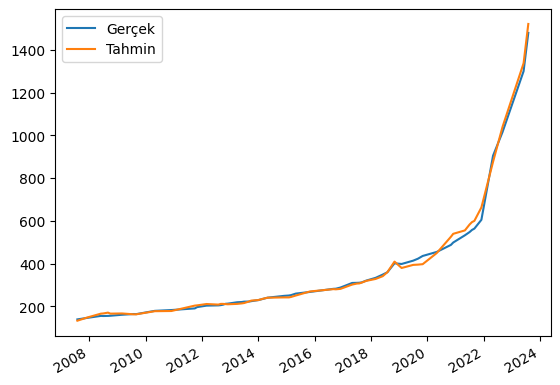

In [733]:
tahminler["Gerçek"].plot(label="Gerçek")
tahminler["Tahmin"].plot(label="Tahmin")
plt.legend()
plt.show()

In [734]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
train_data = df6['USD/TL'].head(212)[:len(df6.rolling(3).mean().dropna())-12]
test_data = df6['USD/TL'].head(212)[len(df6.rolling(3).mean().dropna())-12:]


ar_model = AutoReg(df6['USD/TL'].head(212).rolling(3).mean().dropna(), lags=1)
ar_fit = ar_model.fit()
ar_forecast = ar_fit.predict(start="2023-10-30", end="2024-09-30", dynamic=False)
ar_forecast




2023-10-31    27.965733
2023-11-30    29.164494
2023-12-31    30.418338
2024-01-31    31.729799
2024-02-29    33.101522
2024-03-31    34.536278
2024-04-30    36.036963
2024-05-31    37.606606
2024-06-30    39.248376
2024-07-31    40.965588
2024-08-31    42.761707
2024-09-30    44.640360
Freq: M, dtype: float64

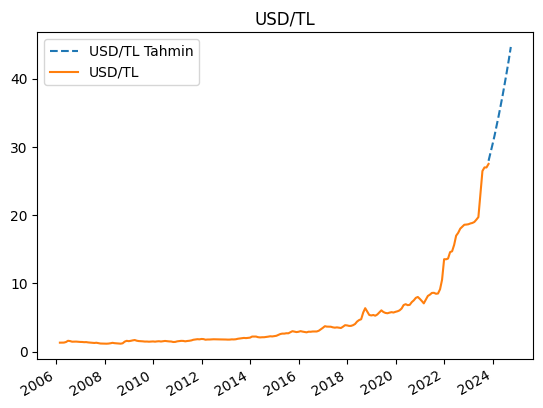

In [735]:
usdtahmin=pd.DataFrame(ar_forecast)
usdtahmin.columns=["USD Tahmin"]
usdtahmin["USD Tahmin"]=usdtahmin["USD Tahmin"].astype(float)
usdtahmin=usdtahmin.set_index(pd.date_range('2023-10-30','2024-10-29' , freq='1M'))
plt.plot(usdtahmin,"--",label="USD/TL Tahmin")
df6["USD/TL"].plot(label="USD/TL")
plt.title("USD/TL")
plt.legend()


c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Bora\AppD

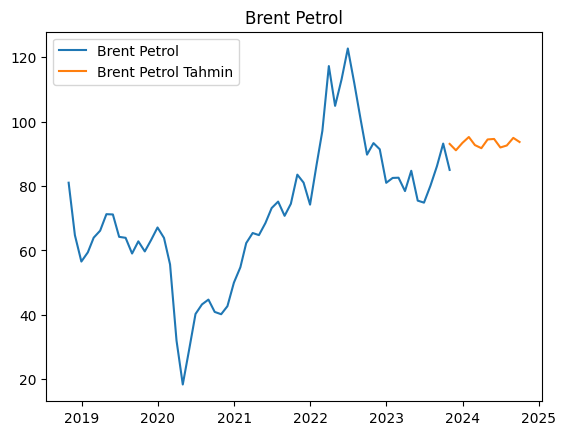

In [736]:
# Modeli eğitim verisi üzerinde eğitme
model = ARIMA(df14["Brent"].head(212), order=(4,1,2))
# Modeli tekrar eğitim verisi üzerinde eğitme
model_fit = model.fit()

# Tahmin yapma
forecast = model_fit.forecast(steps=12)
predictions = forecast.values
predictions = pd.DataFrame(predictions,index=pd.date_range('2023-10-30', periods=12, freq='M'))
brenttahmin=pd.DataFrame(predictions)
brenttahmin.columns=["Brent Tahmin"]
brenttahmin=brenttahmin.set_index(pd.date_range('2023-10-30','2024-10-29' , freq='1M'))
plt.plot(df14.tail(61),label="Brent Petrol")
plt.plot(brenttahmin.tail(61),label="Brent Petrol Tahmin")
plt.title("Brent Petrol")
plt.legend()

c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


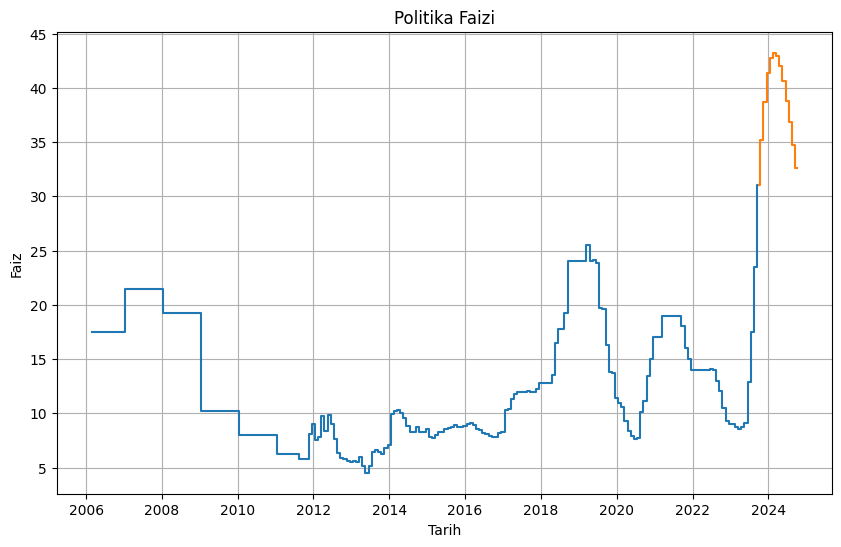

In [737]:
# En uygun parametrelerle ARIMA modelini eğitme
optimal_model = ARIMA(pfaiz.head(212), order=(4,1,1))
optimal_model_fit = optimal_model.fit()

# Gelecek 12 ay için tahmin yapma
optimal_future_forecast = optimal_model_fit.forecast(steps=12)
optimal_future_predictions = optimal_future_forecast.values

optimal_future_predictions = pd.DataFrame(optimal_future_predictions,index=pd.date_range('2023-10-30', periods=12, freq='M'))

faiztahmin=pd.DataFrame(optimal_future_predictions)
faiztahmin.columns=["Politika Faizi"]
faiztahmin=faiztahmin.set_index(pd.date_range('2023-10-30','2024-10-29' , freq='1M'))
faiztahmin=pd.concat([pfaiz.head(212),faiztahmin],axis=0)
kademeli = [faiztahmin.iloc[0]]
for i in range(1, len(faiztahmin)):
    kademeli.append(faiztahmin.iloc[i])

# Tarihleri x ekseni olarak ve kademeli fiyatları y ekseni olarak kullanarak kademeli bir grafik çiz
plt.figure(figsize=(10, 6))
plt.step(faiztahmin[:212].index, kademeli[:212], where='mid', linestyle='-')
plt.step(faiztahmin[211:].index, kademeli[211:], where='mid', linestyle='-')
plt.title('Politika Faizi')
plt.xlabel('Tarih')
plt.ylabel('Faiz')
plt.grid(True)


In [738]:
# En uygun parametrelerle ARIMA modelini eğitme
optimal_model = ARIMA(money["Para Arzi"].head(212), order=(4,3,4))
optimal_model_fit = optimal_model.fit()

# Gelecek 12 ay için tahmin yapma
optimal_future_forecast = optimal_model_fit.forecast(steps=12)
optimal_future_predictions = optimal_future_forecast.values

optimal_future_predictions = pd.DataFrame(optimal_future_predictions,index=pd.date_range('2023-10-30', periods=12, freq='M'))
paraarzitahmin=pd.DataFrame(optimal_future_predictions)
paraarzitahmin.columns=["Para Arzı Tahmin"]
paraarzitahmin=paraarzitahmin.set_index(pd.date_range('2023-10-30','2024-10-29' , freq='1M'))
paraarzitahmin=paraarzitahmin.tail(12)
paraarzitahmin


c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


,Para Arzı Tahmin
2023-10-31,134.300567
2023-11-30,142.074590
2023-12-31,146.981451
2024-01-31,153.628404
2024-02-29,160.652723
2024-03-31,166.756281
2024-04-30,174.545581
2024-05-31,181.584534
2024-06-30,189.116890
2024-07-31,197.371394


In [739]:
# En uygun parametrelerle ARIMA modelini eğitme
optimal_model = ARIMA(df3["Kredi"].head(212), order=(4,3,4))
optimal_model_fit = optimal_model.fit()

# Gelecek 12 ay için tahmin yapma
optimal_future_forecast = optimal_model_fit.forecast(steps=12)
optimal_future_predictions = optimal_future_forecast.values

optimal_future_predictions = pd.DataFrame(optimal_future_predictions,index=pd.date_range('2023-10-30', periods=12, freq='M'))
kreditahmin=pd.DataFrame(optimal_future_predictions)
kreditahmin.columns=["Kredi Tahmin"]
kreditahmin=kreditahmin.set_index(pd.date_range('2023-10-30','2024-10-29' , freq='1M'))
kreditahmin=kreditahmin.tail(12)
kreditahmin

c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,Kredi Tahmin
2023-10-31,106.014339
2023-11-30,108.341795
2023-12-31,112.112480
2024-01-31,115.847979
2024-02-29,118.067433
2024-03-31,121.462983
2024-04-30,125.584769
2024-05-31,128.058339
2024-06-30,131.047701
2024-07-31,135.347269


In [740]:
# En uygun parametrelerle ARIMA modelini eğitme
optimal_model = ARIMA(kfaiz["Kredi Faizi"].head(212), order=(1,1,0))
optimal_model_fit = optimal_model.fit()

# Gelecek 12 ay için tahmin yapma
optimal_future_forecast = optimal_model_fit.forecast(steps=12)
optimal_future_predictions = optimal_future_forecast.values

optimal_future_predictions = pd.DataFrame(optimal_future_predictions,index=pd.date_range('2023-10-30', periods=12, freq='M'))
optimal_future_predictions.columns=["Kredi Faizi Tahmin"]



kfaiztahmin=pd.DataFrame(optimal_future_forecast)
kfaiztahmin=kfaiztahmin.set_index(pd.date_range('2023-10-30','2024-10-29' , freq='1M'))
kfaiztahmin.columns=["Kredi Faizi Tahmin"]
kfaiztahmin=kfaiztahmin.tail(12)
kfaiztahmin

,Kredi Faizi Tahmin
2023-10-31,61.831260
2023-11-30,64.738025
2023-12-31,66.265025
2024-01-31,67.067198
2024-02-29,67.488600
2024-03-31,67.709974
2024-04-30,67.826267
2024-05-31,67.887359
2024-06-30,67.919453
2024-07-31,67.936312


In [741]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarimax_model=SARIMAX(endeks,order=(1,1,0),seasonal_order=(1,1,0,12))
sarimax_fit=sarimax_model.fit()
sarimax_forecast=sarimax_fit.forecast(steps=12)
sarimax_forecast=pd.DataFrame(sarimax_forecast)
sarimax_forecast.columns=["Endeks Tahmin"]
endekstahmin=sarimax_forecast.set_index(pd.date_range('2023-10-30','2024-10-29' , freq='1M'))
endekstahmin

,Endeks Tahmin
2023-10-31,883.568984
2023-11-30,877.208563
2023-12-31,784.703044
2024-01-31,740.277811
2024-02-29,706.768985
2024-03-31,687.228732
2024-04-30,673.594148
2024-05-31,693.047052
2024-06-30,767.648115
2024-07-31,835.054823


In [742]:
X=pd.concat([df6["USD/TL"],money["Para Arzi"],df14.Brent,df3.Kredi,kfaiz["Kredi Faizi"],endeks],axis=1)
X.columns=["USD/TL","Para Arzi","Brent","Kredi","Kredi Faizi","Parasal Sıkılaşma Endeksi"]
X=X.dropna(axis=0)
X=X.head(210)
X=X.tail(200)
X


,USD/TL,Para Arzi,Brent,Kredi,Kredi Faizi,Parasal Sıkılaşma Endeksi
2007-02-28,1.396940,2.982621,57.555789,1.931193,23.0325,950.790313
2007-03-31,1.409632,3.073813,62.050455,1.998175,22.3980,864.577475
2007-04-30,1.361815,3.097736,67.485789,2.032833,21.6600,808.754041
2007-05-31,1.338283,3.168990,67.212273,2.058730,21.2500,901.085561
2007-06-30,1.321548,3.228836,71.045714,2.146599,21.1060,950.612573
...,...,...,...,...,...,...
2023-05-31,19.719514,94.093167,75.466000,88.043441,32.0225,212.288064
2023-06-30,23.106042,108.345324,74.839091,95.646045,38.5600,421.688835
2023-07-31,26.470338,114.784753,80.108095,98.468952,45.8250,571.209451
2023-08-31,26.999127,120.253199,86.147727,99.238055,45.7650,581.440451


In [743]:
tahmindf=pd.DataFrame()
tahmindf["USD Tahmin"]=usdtahmin["USD Tahmin"]
tahmindf["Para Arzı Tahmin"]=paraarzitahmin["Para Arzı Tahmin"]
tahmindf["Brent Tahmin"]=brenttahmin["Brent Tahmin"]
tahmindf["Kredi Tahmin"]=kreditahmin["Kredi Tahmin"]
tahmindf["Kredi Faizi Tahmin"]=kfaiztahmin["Kredi Faizi Tahmin"]
tahmindf["Parasal Sıkılaşma Endeksi Tahmin"]=endekstahmin["Endeks Tahmin"]
tahmindf=tahmindf.set_index(pd.date_range('2023-10-30','2024-10-29' , freq='1M'))
tahmindf.columns=X.columns
extended_X=pd.concat([X,tahmindf],axis=0)
extended_X["USD/TL"]=extended_X["USD/TL"].rolling(3).mean()
extended_X["Para Arzi"]=extended_X["Para Arzi"].shift(1)
extended_X=extended_X.dropna(axis=0)
extended_X


,USD/TL,Para Arzi,Brent,Kredi,Kredi Faizi,Parasal Sıkılaşma Endeksi
2007-04-30,1.389462,3.073813,67.485789,2.032833,21.660000,808.754041
2007-05-31,1.369910,3.097736,67.212273,2.058730,21.250000,901.085561
2007-06-30,1.340548,3.168990,71.045714,2.146599,21.106000,950.612573
2007-07-31,1.313987,3.228836,76.930000,2.172793,20.745000,1137.446010
2007-08-31,1.306092,3.253272,70.760870,2.241511,19.986000,1048.221149
...,...,...,...,...,...,...
2024-05-31,36.059949,174.545581,94.615607,128.058339,67.887359,693.047052
2024-06-30,37.630649,181.584534,91.970427,131.047701,67.919453,767.648115
2024-07-31,39.273523,189.116890,92.592040,135.347269,67.936312,835.054823
2024-08-31,40.991890,197.371394,94.952706,138.226231,67.945169,831.568009


In [744]:

X=extended_X.iloc[:198]
y=df["CPI"]
y=y.iloc[14:212]
y

2007-04-30     139.33
2007-05-31     140.03
2007-06-30     139.69
2007-07-31     138.67
2007-08-31     138.70
               ...   
2023-05-31    1300.60
2023-06-30    1351.59
2023-07-31    1479.84
2023-08-31    1614.31
2023-09-30    1691.04
Freq: M, Name: CPI, Length: 198, dtype: float64

In [745]:
import statsmodels.api as sm
X_train_with_const = sm.add_constant(X)
model=sm.OLS(y,X_train_with_const)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.234e+04
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          2.42e-244
Time:                        03:28:22   Log-Likelihood:                -820.94
No. Observations:                 198   AIC:                             1656.
Df Residuals:                     191   BIC:                             1679.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [746]:
import statsmodels.api as sm
tahmin3=pd.DataFrame(results.predict(sm.add_constant(extended_X)),columns=["CPI"])
tahmin3=tahmin3.dropna(axis=0)
tahmin3["Aylık Enflasyon"]=tahmin3["CPI"]/tahmin3["CPI"].shift(1)
tahmin3.tail(12)


,CPI,Aylık Enflasyon
2023-10-31,1705.586427,1.030061
2023-11-30,1809.997536,1.061217
2023-12-31,1900.084568,1.049772
2024-01-31,1965.221673,1.034281
2024-02-29,2039.612183,1.037853
2024-03-31,2119.309282,1.039075
2024-04-30,2193.925486,1.035208
2024-05-31,2276.986074,1.037859
2024-06-30,2353.378315,1.033550
2024-07-31,2437.902066,1.035916


In [747]:
dates=pd.date_range('2006-02-01','2023-11-01' , freq='1M')
df=pd.DataFrame()

df["CPI"]=inflation["TÜFE"]
df=df.set_index(dates)
df=df.head(212)
df=pd.concat([df,tahmin3["CPI"].iloc[-12:]],axis=0)
df.iloc[-12:,0]=df.iloc[-12:,1]


df["Aylık Enflasyon"]=tahmin3["Aylık Enflasyon"]
del df[0]
for i in range(-12,0):
    df.iloc[i,0]=df.iloc[i-1,0]*(df.iloc[i,1])
df.tail(12)



,CPI,Aylık Enflasyon
2023-10-31,1741.873807,1.030061
2023-11-30,1848.506325,1.061217
2023-12-31,1940.510013,1.049772
2024-01-31,2007.032949,1.034281
2024-02-29,2083.006162,1.037853
2024-03-31,2164.398865,1.039075
2024-04-30,2240.602574,1.035208
2024-05-31,2325.430326,1.037859
2024-06-30,2403.447858,1.033550
2024-07-31,2489.769903,1.035916


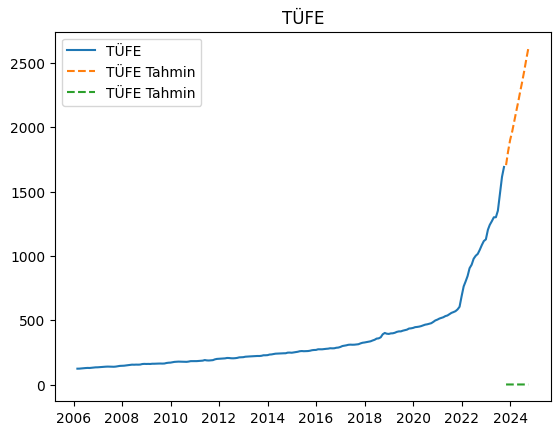

In [748]:

plt.plot(df["CPI"].iloc[:212],label="TÜFE")
plt.plot(tahmin3.tail(12),"--",label="TÜFE Tahmin")
plt.title("TÜFE")
plt.legend()

In [782]:

data=pd.DataFrame()
dates=pd.date_range(start='2006-02-01', periods=212, freq='M')

# Veriyi bir veri çerçevesine yerleştirme

pfaiz=pfaiz.head(212)

df6=df6.head(212)
money=money.head(212)
df14=df14.head(212)
df3=df3.head(212)


pfaiz=pfaiz.set_index(dates)
df6=df6.set_index(dates)
money=money.set_index(dates)
df14=df14.set_index(dates)
df3=df3.set_index(dates)



data["USD/TL"]=df6["USD/TL"].rolling(3).mean().dropna()
data["Para Arzı"]=money["Para Arzi Onceki"]
data["Brent"]=df14["Brent"]
data["Kredi"]=df3["Kredi"]
data["Kredi Faizi"]=kfaiz["Kredi Faizi"]
data["Parasal Sıkılaşma Endeksi"]=endeks
data["TÜFE"]=df["CPI"]
data=data.iloc[105:,:]
data



,USD/TL,Para Arzı,Brent,Kredi,Kredi Faizi,Parasal Sıkılaşma Endeksi,TÜFE
2015-01-31,2.287307,10.180899,47.759500,12.272494,13.8040,263.049743,250.45
2015-02-28,2.361320,10.437975,58.095500,12.572626,13.6600,257.856062,252.24
2015-03-31,2.460226,10.716984,55.885455,12.873253,13.3425,269.529099,255.23
2015-04-30,2.567023,11.003396,59.524286,13.165457,13.5925,275.692489,259.39
2015-05-31,2.630780,11.095646,64.075000,13.361082,14.1700,279.245031,260.85
...,...,...,...,...,...,...,...
2023-05-31,19.353341,94.093167,75.466000,88.043441,32.0225,212.288064,1300.60
2023-06-30,20.720863,108.345324,74.839091,95.646045,38.5600,421.688835,1351.59
2023-07-31,23.098631,114.784753,80.108095,98.468952,45.8250,571.209451,1479.84
2023-08-31,25.525169,120.253199,86.147727,99.238055,45.7650,581.440451,1614.31


In [783]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse



# Veriyi eğitim ve test setlerine ayır
train_size = int(0.93 * len(data))
train, test = data[:train_size], data[train_size:]

# VAR modelini eğit
model = VAR(train)
model_fitted = model.fit()

# Tahmin yap
lag_order = model_fitted.k_ar  # En iyi gecikme sayısını kullan
forecast = model_fitted.forecast(train.values[-lag_order:], steps=len(test))

# Tahmin sonuçlarını bir veri çerçevesine dök
forecast_df = pd.DataFrame(forecast[:,6], columns=['Tahmin'], index=test.index)

# Gerçek değerler ile tahminleri karşılaştır
rmse_score = rmse(test["TÜFE"], forecast_df["Tahmin"])
print("RMSE:", rmse_score)

# Tahmin sonuçlarını ve gerçek değerleri görselleştir


RMSE: 42.706672085665474


In [774]:
forecast_df

,Tahmin
2007-02-28,1.047239e+03
2007-03-31,1.088323e+03
2007-04-30,1.127039e+03
2007-05-31,1.166196e+03
2007-06-30,1.208179e+03
...,...
2023-05-31,7.265792e+07
2023-06-30,7.709477e+07
2023-07-31,8.180256e+07
2023-08-31,8.679782e+07


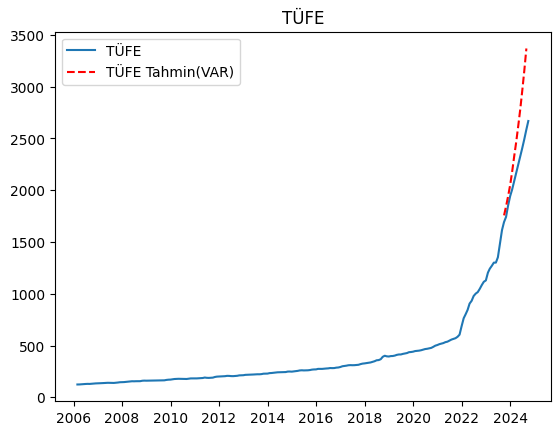

In [772]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR



# Tüm veriyi kullanarak VAR modelini eğit
model = VAR(data)
model_fitted = model.fit(maxlags=3)

# Gelecek 12 ayı tahmin et
lag_order = model_fitted.k_ar
forecast = model_fitted.forecast(data.values[-lag_order:], steps=12)

# Tahmin sonuçlarını bir veri çerçevesine dök
forecast_var = pd.DataFrame(forecast[:,6],columns=["TÜFE"])

# Tahmin sonuçlarını yazdır
forecast_var=forecast_var.set_index(pd.date_range('2023-10-01','2024-10-01' , freq='1M')-pd.offsets.MonthBegin(1))
plt.plot(df["CPI"],label="TÜFE")
plt.plot(forecast_var["TÜFE"],"--",label="TÜFE Tahmin(VAR)",color="red")
plt.title("TÜFE")
plt.legend()

In [753]:
import numpy as np
import pandas as pd
import statsmodels.tsa.api as sm
data=pd.DataFrame()
dates=pd.date_range(start='2006-02-01', periods=212, freq='M')
data["USD/TL"]=df6["USD/TL"]
data["Para Arzı"]=money["Para Arzi"]
data["Brent"]=df14["Brent"]
data["Kredi"]=df3["Kredi"]
data["Kredi Faizi"]=kfaiz["Kredi Faizi"]
data["Parasal Sıkılaşma Endeksi"]=endeks
data["TÜFE"]=df["CPI"]
data=data.dropna(axis=0)
data

,USD/TL,Para Arzı,Brent,Kredi,Kredi Faizi,Parasal Sıkılaşma Endeksi,TÜFE
2007-02-28,1.396940,3.073813,57.555789,1.931193,23.0325,950.790313,136.42
2007-03-31,1.409632,3.097736,62.050455,1.998175,22.3980,864.577475,137.67
2007-04-30,1.361815,3.168990,67.485789,2.032833,21.6600,808.754041,139.33
2007-05-31,1.338283,3.228836,67.212273,2.058730,21.2500,901.085561,140.03
2007-06-30,1.321548,3.253272,71.045714,2.146599,21.1060,950.612573,139.69
...,...,...,...,...,...,...,...
2023-05-31,19.719514,108.345324,75.466000,88.043441,32.0225,212.288064,1300.60
2023-06-30,23.106042,114.784753,74.839091,95.646045,38.5600,421.688835,1351.59
2023-07-31,26.470338,120.253199,80.108095,98.468952,45.8250,571.209451,1479.84
2023-08-31,26.999127,123.492792,86.147727,99.238055,45.7650,581.440451,1614.31


In [754]:
import numpy as np
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import select_order
from statsmodels.tsa.vector_ar.vecm import VECM
import matplotlib.pyplot as plt




order_select = select_order(data, maxlags=3)
best_order = order_select.selected_orders

# VECM modelini oluşturma ve eğitme
model = VECM(data, k_ar_diff=best_order['bic'], coint_rank=1,deterministic="lo",seasons=12)
model_fit = model.fit()


predictions = model_fit.predict(steps=12)


tahmin4=pd.DataFrame(predictions[:,6])
tahmin4.columns=["TÜFE"]
dates=pd.date_range('2023-10-01','2024-10-01' , freq='1M')-pd.offsets.MonthBegin(1)
tahmin4=tahmin4.set_index(dates)
tahmin4

,TÜFE
2023-10-01,1756.899626
2023-11-01,1841.370980
2023-12-01,1930.927830
2024-01-01,2018.309817
2024-02-01,2097.810550
2024-03-01,2181.475982
2024-04-01,2270.662198
2024-05-01,2357.302078
2024-06-01,2449.588110
2024-07-01,2548.154336


In [755]:
dff=df["CPI"]
dff=pd.DataFrame(dff)
dff.columns=["CPI"]



dfas4=pd.concat([df["CPI"].head(212),tahmin4["TÜFE"]],axis=0)
dfas4=pd.DataFrame(dfas4)
dfas4.columns=["CPI"]

dfas5=pd.concat([df["CPI"].head(212),forecast_var["TÜFE"]],axis=0)
dfas5=pd.DataFrame(dfas5)
dfas5.columns=["CPI"]











In [756]:
import pandas as pd

# Örnek DataFrame oluşturalım (gerçek verilere göre değiştirin)
# Diyelim ki veriler 'tufe' sütununda ve 'tarih' sütununda saklanıyor




# 12 ay önceki tüfe değerlerini içeren bir sütun ekleyin
dff['onceki_yil_tufe'] = dff['CPI'].shift(12)
dfas4['onceki_yil_tufe'] = dfas4['CPI'].shift(12)
dfas5['onceki_yil_tufe'] = dfas5['CPI'].shift(12)



# Yüzde artışı hesaplayın ve 'yillik_enflasyon_orani' sütununu ekleyin
dff['yillik_enflasyon_orani'] = ((dff['CPI'] / dff['onceki_yil_tufe']) - 1) * 100
dfas4['yillik_enflasyon_orani'] = ((dfas4['CPI'] / dfas4['onceki_yil_tufe']) - 1) * 100
dfas5['yillik_enflasyon_orani'] = ((dfas5['CPI'] / dfas5['onceki_yil_tufe']) - 1) * 100

# NaN değerleri (ilk 12 ay) veriden çıkarın
dff.dropna(inplace=True)
dfas4.dropna(inplace=True)
dfas5.dropna(inplace=True)





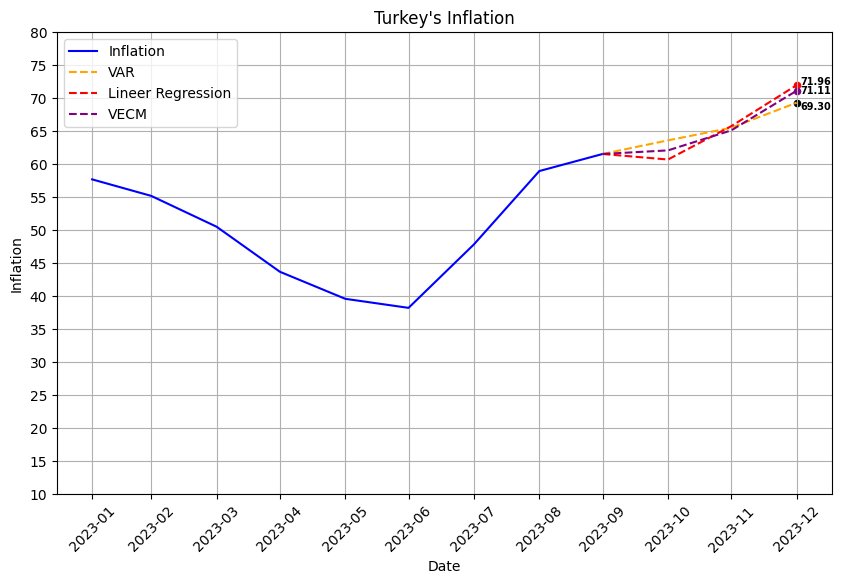

In [770]:
dates=pd.date_range('2007-02-28','2024-10-29' , freq='1M')
dff=dff.set_index(dates)
dfas4=dfas4.set_index(dates)
dfas5=dfas5.set_index(dates)







# Grafik çizdirelim
plt.figure(figsize=(10, 6))
plt.plot(dff.iloc[191:200]["yillik_enflasyon_orani"], label='Inflation', color='blue')
#plt.plot(dfas2.iloc[198:203]["yillik_enflasyon_orani"],'--', label='Forecast with monetary tightening', color='green')
plt.plot(dfas5.iloc[199:203]["yillik_enflasyon_orani"],'--',label='VAR', color='orange')
plt.plot(dff.iloc[199:203]["yillik_enflasyon_orani"],'--',label='Lineer Regression', color='red')
plt.plot(dfas4.iloc[199:203]["yillik_enflasyon_orani"],'--',label='VECM', color='purple')



plt.xlabel('Date')
plt.ylabel('Inflation')
plt.xticks(dff.iloc[191:].index, dff.iloc[191:].index.strftime('%Y-%m'), rotation=45)
y_max = int(max(dff["yillik_enflasyon_orani"].iloc[191:]))
y_min = 10
y_interval = 0.5
y_ticks = [y_min]
while y_ticks[-1] < y_max:
    y_ticks.append(y_ticks[-1] + 5)

son_dort_veri=dff["yillik_enflasyon_orani"].iloc[202:203]
son_dort_veri3=dfas4["yillik_enflasyon_orani"].iloc[202:203]
son_dort_veri4=dfas5["yillik_enflasyon_orani"].iloc[202:203]



# Y ekseni etiketlerini ayarlama
for i, v in enumerate(son_dort_veri):
    plt.annotate(f'{v:.2f}', (son_dort_veri.index[i], v), xytext=(3, 0), textcoords='offset points', fontsize=7,
                 color='black', fontweight='bold')
    plt.scatter(son_dort_veri.index,son_dort_veri,color='red',s=20)


for i, v in enumerate(son_dort_veri3):
    plt.annotate(f'{v:.2f}', (son_dort_veri3.index[i], v), xytext=(3, -2), textcoords='offset points', fontsize=7,
                 color='black', fontweight='bold')
    plt.scatter(son_dort_veri3.index,son_dort_veri3,color='purple',s=20)

for i,v in enumerate(son_dort_veri4):
    plt.annotate(f'{v:.2f}', (son_dort_veri4.index[i], v), xytext=(3, -5), textcoords='offset points', fontsize=7,
                 color='black', fontweight='bold')
    plt.scatter(son_dort_veri4.index,son_dort_veri4,color='black',s=20)



#for i,v in enumerate(son_dort_veri6):
 #   plt.annotate(f'{v:.2f}', (son_dort_veri5.index[i], v), xytext=(3, -4), textcoords='offset points', fontsize=7,
  #               color='black', fontweight='bold')
   # plt.scatter(son_dort_veri6.index,son_dort_veri6,color='green',s=20)






# Y ekseni etiketlerini ayarlama
plt.yticks(y_ticks)
plt.title("Turkey's Inflation")
plt.legend()
plt.grid(True)
plt.show()


#VAR ve VECM modelleri neredeyse aynı tahmini yaptığından üst üste gelmiş olarak gözüküyor.

In [758]:
lineer_regression=(((dff.loc['2023-10-31']["CPI"]/dff.loc['2023-09-30']["CPI"])-1)*100)
var=(((dfas5.loc['2023-10-31']["CPI"]/dfas5.loc['2023-09-30']["CPI"])-1)*100)
vecm=(((dfas4.loc['2023-10-31']["CPI"]/dfas4.loc['2023-09-30']["CPI"])-1)*100)
ortalama=(lineer_regression+var+vecm)/3







In [759]:
lineer_regression_yillik=(((dff.loc['2023-12-31']["CPI"]/dff.loc['2022-12-31']["CPI"])-1)*100)
var_yillik=(((dfas5.loc['2023-12-31']["CPI"]/dfas5.loc['2022-12-31']["CPI"])-1)*100)
vecm_yillik=(((dfas4.loc['2023-12-31']["CPI"]/dfas4.loc['2022-12-31']["CPI"])-1)*100)
ortalama_yillik=(lineer_regression_yillik+var_yillik+vecm_yillik)/3



In [760]:
lineer_regresyon_12ay=(((dff.loc['2024-09-30']["CPI"]/dff.loc['2023-09-30']["CPI"])-1)*100)
var_12ay=(((dfas5.loc['2024-09-30']["CPI"]/dfas5.loc['2023-09-30']["CPI"])-1)*100)
vecm_12ay=(((dfas4.loc['2024-09-30']["CPI"]/dfas4.loc['2023-09-30']["CPI"])-1)*100)
ortalama_12ay=(lineer_regresyon_12ay+var_12ay+vecm_12ay)/3

In [771]:
tahminler=pd.DataFrame({"Ekim 2023(Aylık)":[lineer_regression,var,vecm,ortalama],"Yıl Sonu":[lineer_regression_yillik,var_yillik,vecm_yillik,ortalama_yillik],"12 Ay Sonrası":[lineer_regresyon_12ay,var_12ay,vecm_12ay,ortalama_12ay]},index=["Lineer Regression","VAR","VECM","Ortalama"])
tahminler



,Ekim 2023(Aylık),Yıl Sonu,12 Ay Sonrası
Lineer Regression,3.006068,71.962427,57.739212
VAR,4.868551,69.299513,50.046633
VECM,3.894623,71.113282,62.827175
Ortalama,3.923081,70.791741,56.871007
